In [1]:
from ctd.comparison.analysis.tt.tt import Analysis_TT
from ctd.comparison.analysis.dt.dt import Analysis_DT
from ctd.comparison.comparison import Comparison
import dotenv
import os
import sys
# import environment variables
dotenv.load_dotenv(override=True)
HOME_DIR = os.getenv("HOME_DIR")
print(HOME_DIR)


/home/csverst/Github/CtDBenchmark/


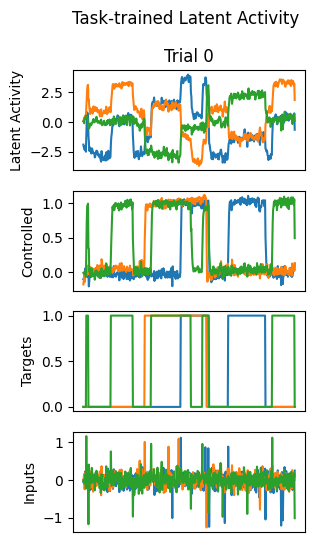

In [4]:
tt_path = HOME_DIR + "content/trained_models/task-trained/tt_3bff/"
tt_analysis = Analysis_TT(run_name = "tt_3bff",filepath=tt_path)

tt_analysis.plot_trial_io(num_trials= 1)

In [3]:

# REPLACE THESE PATHS WITH YOUR OWN DT MODEL PATHS
gru_sweep_path = tt_path + "n_neurons_50_obs_noise_pseudoPoisson_dispersion_1.0_see/20240611_GRU_Resim3bff_Test/"
node_sweep_path = tt_path + "n_neurons_50_obs_noise_pseudoPoisson_dispersion_1.0_see/20240611_NODE_Resim3bff_Test/"
lds_sweep_path = tt_path + "n_neurons_50_obs_noise_pseudoPoisson_dispersion_1.0_see/20240611_LDS_Resim3bff_Test/"

gru_subfolders = [f.path for f in os.scandir(gru_sweep_path) if f.is_dir()]
node_subfolders = [f.path for f in os.scandir(node_sweep_path) if f.is_dir()]
lds_subfolders = [f.path for f in os.scandir(lds_sweep_path) if f.is_dir()]

NameError: name 'gru_sweep_path' is not defined

In [ ]:
comparison = Comparison(comparison_tag = "3BFF_GRU")
comparison.load_analysis(tt_analysis, group = "TT", reference_analysis=True)
for subfolder in gru_subfolders:
    subfolder = subfolder + "/"
    analysis_GRU = Analysis_DT.create(run_name = "GRU", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_GRU, group = "GRU")

for subfolder in node_subfolders:
    subfolder = subfolder + "/"
    analysis_Node = Analysis_DT.create(run_name = "Node", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_Node, group = "Node")

for subfolder in lds_subfolders:
    subfolder = subfolder + "/"
    analysis_LDS = Analysis_DT.create(run_name = "LDS", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_LDS, group = "LDS")
    

In [ ]:
plot_dict = {
    "save_pdf": True,
    "ax_lim": [0.15, 1.05],
    "marker": "o",
}
comparison.compare_rate_state_r2(plot_dict=plot_dict)